In [1]:
from keras.models import Sequential
from keras.layers import Dense

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
X, y = make_blobs(10000, centers=5, random_state=42)

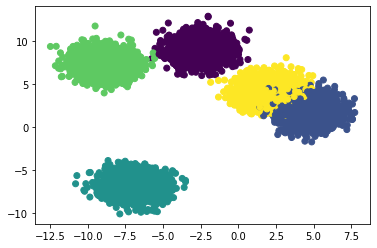

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
y_hot = OneHotEncoder().fit_transform(y.reshape(-1, 1)).todense()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(10, input_shape=(2,), activation="sigmoid", name ="l1"))
model.add(Dense(5, activation="softmax", name ="l2"))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 10)                30        
_________________________________________________________________
l2 (Dense)                   (None, 5)                 55        
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
     loss='categorical_crossentropy',
    metrics=['accuracy'])

In [14]:
output = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
6700/6700 [==============================] - 0s 42us/step - loss: 0.0765 - accuracy: 0.9775
Epoch 2/20
6700/6700 [==============================] - 0s 19us/step - loss: 0.0739 - accuracy: 0.9782
Epoch 3/20
6700/6700 [==============================] - 0s 53us/step - loss: 0.0720 - accuracy: 0.9775
Epoch 4/20
6700/6700 [==============================] - 0s 20us/step - loss: 0.0702 - accuracy: 0.9775
Epoch 5/20
6700/6700 [==============================] - 0s 45us/step - loss: 0.0686 - accuracy: 0.9775
Epoch 6/20
6700/6700 [==============================] - 0s 31us/step - loss: 0.0673 - accuracy: 0.9778
Epoch 7/20
6700/6700 [==============================] - 0s 74us/step - loss: 0.0660 - accuracy: 0.9773
Epoch 8/20
6700/6700 [==============================] - 0s 57us/step - loss: 0.0650 - accuracy: 0.9776
Epoch 9/20
6700/6700 [==============================] - 0s 28us/step - loss: 0.0640 - accuracy: 0.9778
Epoch 10/20
6700/6700 [==============================] - 0s 71us/step - l

In [15]:
model.evaluate(X_test, y_test, verbose=0)

[0.05830967149499691, 0.9784848690032959]

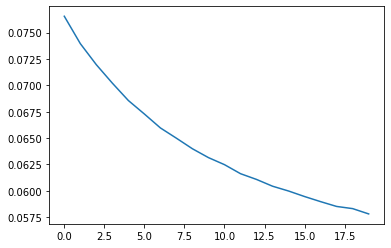

In [17]:
plt.plot(output.history["loss"])

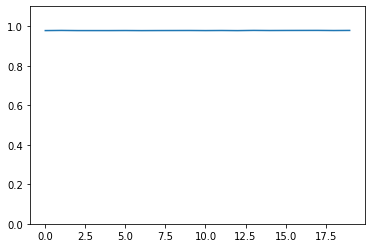

In [19]:
plt.figure()
plt.plot(output.history["accuracy"])
plt.ylim(0, 1.1)
plt.show()